In [13]:
# Gerekli kütüphaneleri yükleme
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

# Veriyi yükleme , verisetini kendi cihazıma indirip kullandım.
df = pd.read_csv('flights.csv')


Proje Özeti:
Bu proje, Kaggle'dan elde edilen uçuş verileri üzerinde denetimli ve denetimsiz öğrenme yöntemleriyle analiz gerçekleştirmeyi amaçlamaktadır.

Kullanılan Algoritmalar:

Denetimli Öğrenme: Random Forest Regressor

Denetimsiz Öğrenme: KMeans Clustering
Proje Adımları:
* Veri Analizi (EDA)
* Veri Ön İşleme
* Model Seçimi
* Model Eğitimi ve Hiperparametre Optimizasyonu
* Model Değerlendirme


Keşifsel Veri Analizi (EDA):

Veri setinin genel yapısını anlamak için öncelikle keşifsel veri analizi yapmak hedeflenir burada.

In [14]:
# Veri Analizi (EDA)
print(df.head())
print(df.info())
print(df.describe())

   id  year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0   0  2013      1    1     517.0             515        2.0     830.0   
1   1  2013      1    1     533.0             529        4.0     850.0   
2   2  2013      1    1     542.0             540        2.0     923.0   
3   3  2013      1    1     544.0             545       -1.0    1004.0   
4   4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay  ... flight  tailnum origin dest air_time  \
0             819       11.0  ...   1545   N14228    EWR  IAH    227.0   
1             830       20.0  ...   1714   N24211    LGA  IAH    227.0   
2             850       33.0  ...   1141   N619AA    JFK  MIA    160.0   
3            1022      -18.0  ...    725   N804JB    JFK  BQN    183.0   
4             837      -25.0  ...    461   N668DN    LGA  ATL    116.0   

   distance  hour  minute            time_hour                    name  
0      1400     5      15  2013-01-01

In [15]:
# Eksik verileri kontrol edelim
print(df.isnull().sum())


id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64


In [ ]:
# Eksik verileri dolduralım (örneğin, ortalama ile)
df.fillna(df.mean(numeric_only=True), inplace=True) # Only calculate the mean of numeric columns

Veri Ön İşleme Veri setini eğitmeden önce temizleme ve dönüştürme işlemlerini gerçekleştirmeliyiz.

Eksik verileri doldurma veya çıkarma Kategorik değişkenler için Label Encoding veya One-Hot Encoding uygulama

In [17]:
# Kategorik verileri sayısal verilere dönüştürelim
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [18]:
# Veriyi ölçeklendirelim
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

<Axes: xlabel='distance', ylabel='Density'>

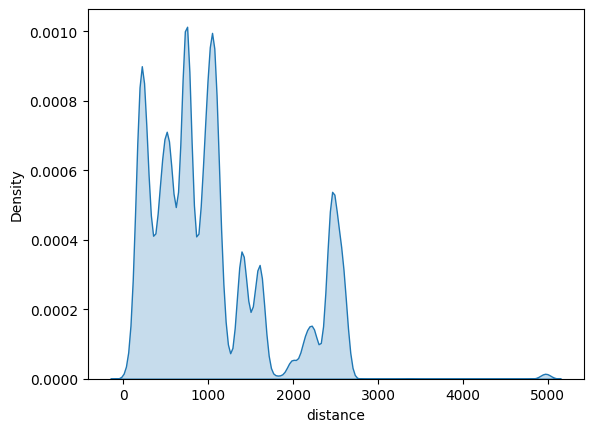

In [20]:
x=df.distance
y=df.air_time
sns.kdeplot(x,fill=True)

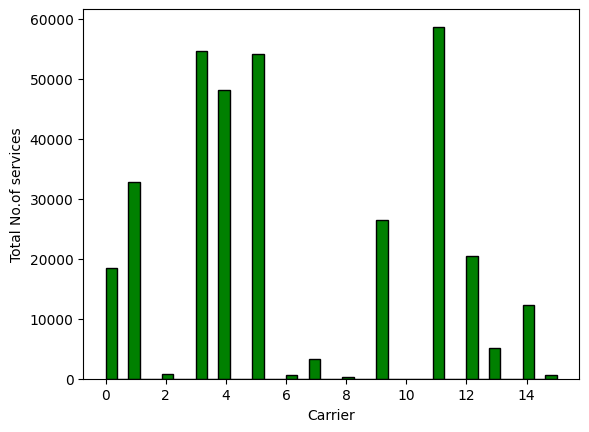

In [21]:
data=df.carrier
plt.hist(data,bins=40,color='green',edgecolor='black',rwidth=1.5)
plt.xlabel('Carrier')
plt.ylabel('Total No.of services')
plt.show()

In [9]:
# Denetimli Öğrenme: Model Seçimi ve Eğitimi
X = df.drop('dep_delay', axis=1)  # Hedef değişkeni çıkar
y = df['dep_delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


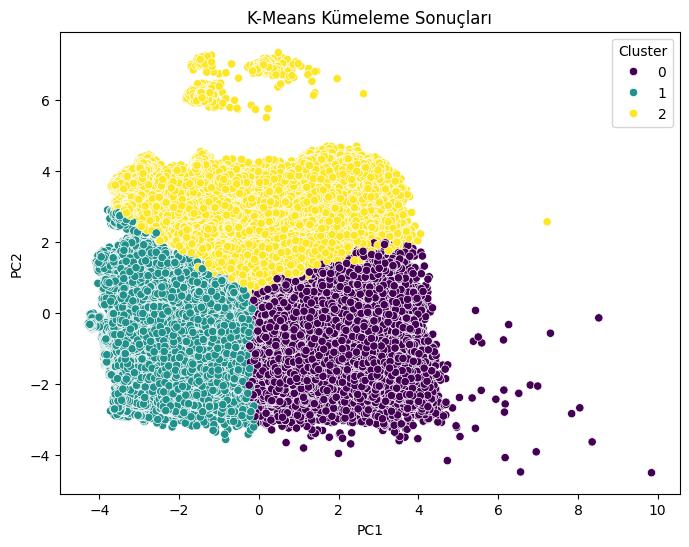

In [10]:
# Denetimsiz Öğrenme: K-Means Kümeleme
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_features)

# PCA ile görselleştirme
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('K-Means Kümeleme Sonuçları')
plt.show()

In [11]:
from sklearn.ensemble import RandomForestRegressor# Model eğitimi (örneğin, Random Forest)
rf = RandomForestRegressor() # Use a regressor for continuous target variables
param_grid = {
    'n_estimators': [100, ],
    'max_depth': [10, 20],
    'min_samples_split': [2, ]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Use regression metrics for evaluation
from sklearn.metrics import mean_squared_error, r2_score

print("Random Forest Modeli Değerlendirme:")
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

# Accuracy benzeri bir metrik hesaplama
tolerance = 0.1  # %10 tolerans
accuracy_within_tolerance = np.mean(np.abs((y_test - y_pred) / y_test) < tolerance)
print('Accuracy within 10% tolerance:', accuracy_within_tolerance)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Random Forest Modeli Değerlendirme:
Mean Squared Error: 49.93052226743579
R-squared: 0.9678339700122193
Accuracy within 10% tolerance: 0.22051487618029575
